# Análisis de los resultados de Elliot

En este *notebook* analizaremos los resultados obtenidos mediante la librería `Elliot`. Para ello, incluimos gráficas de métricas referentes a las valoraciones (*ratings*) que se predicen en todo el dataset y, por otro lado, la precisión (*accuracy*) de las $k$ recomendaciones, junto con métricas de cobertura (*coverage*), diversidad (*diversity*) y novedad (*novelty*) de las mismas.

## KNN Baseline

In [1]:
import os

# Ruta de resultados de evaluación para el modelo KNN
eval_knn_path = os.path.join(os.getcwd(), "../..", "elliot", "results", "knn")

### Evaluación de la predicción de valoraciones

Las predicciones se han realizado mediante la métrica de similitud implementada, que servirá como predicción de la valoración dada por el usuario al libro (previamente valorado) en función de su perfil de usuario.

In [3]:
import pandas as pd

# Ruta de resultados de evaluación por ratings del modelo KNN
ratings_eval_knn_path = eval_knn_path + "/ratings/"

# Pesos dados a la parte semántica
weights = [100, 80, 60, 40, 20, 0]

# Leer los ficheros de resultados y juntar en un único dataframe
eval_df = pd.DataFrame()
for weight in weights:
    df = pd.read_csv(ratings_eval_knn_path + "/" + str(weight) + ".tsv", sep="\t")
    eval_df = pd.concat([eval_df, df], ignore_index=True)

# Columna con los pesos (en vez de el nombre del modelo)
eval_df["model"] = weights
eval_df.rename(columns={"model": "sem_weight"}, inplace=True)

eval_df

,sem_weight,MAE,MSE,RMSE
0,100,0.280453,0.111927,0.334555
1,80,0.252062,0.091294,0.302149
2,60,0.232094,0.079327,0.281650
3,40,0.222670,0.076026,0.275729
4,20,0.229408,0.081393,0.285294
5,0,0.244625,0.095425,0.308910


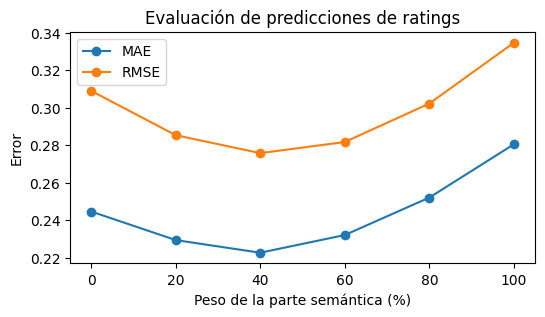

In [4]:
import matplotlib.pyplot as plt

# Gráfica de MAE y RMSE en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(eval_df["sem_weight"], eval_df["MAE"], "o-", label="MAE")
ax.plot(eval_df["sem_weight"], eval_df["RMSE"], "o-", label="RMSE")
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Error")
ax.set_title("Evaluación de predicciones de ratings")
ax.legend()
plt.show()

La versión del modelo en la que se pondera a partes iguales la parte semántica y la de *sentiment analysis* es la que mejores resultados obtiene en cuanto a error en las predicciones de las valoraciones se refiere. Además, el modelo obtiene unos valores de error relativamente buenos.

### Evaluación de las recomendaciones

Se han realizado varios experimentos teniendo en cuenta el *cutoff* de recomendaciones. A la hora de obtener las recomendaciones, se ajustó en $k = 50$, pero también se incluyen datos para $k \in \{25, 10, 5\}$ correspondientes al resto de valores de *cutoff*.

In [5]:
# Ruta de resultados de evaluación de recomendaciones del modelo KNN
rec_eval_knn_path = eval_knn_path + "/top_k/"

# Pesos dados a la parte semántica
weights = [100, 80, 60, 40, 20, 0]

# Cutoffs
cutoffs = [50, 25, 10, 5]

# Leer los ficheros de resultados y juntar en un único dataframe (por cada cutoff)
eval_df_dict = {}
for cutoff in cutoffs:
    eval_df = pd.DataFrame()
    for weight in weights:
        df = pd.read_csv(rec_eval_knn_path + "cutoff_" + str(cutoff) + "_" + str(weight) + ".tsv", sep="\t")
        eval_df = pd.concat([eval_df, df], ignore_index=True)
    eval_df["model"] = weights
    eval_df.rename(columns={"model": "sem_weight"}, inplace=True)
    eval_df_dict[cutoff] = eval_df.copy()

# Cada uno de los dataframes con los resultados de evaluación para un cutoff
for cutoff in eval_df_dict:
    print("Cutoff:", cutoff)
    display(eval_df_dict[cutoff])

Cutoff: 50


,sem_weight,nDCG,Precision,Recall,HR,MAP,MAR,MRR,ItemCoverage,EFD,EPC,Gini
0,100,0.020934,0.010029,0.024855,0.325733,0.013218,0.014660,0.059196,2056.0,0.152796,0.011684,0.026659
1,80,0.020657,0.009971,0.024612,0.330433,0.013195,0.014682,0.058869,1954.0,0.152184,0.011632,0.026890
2,60,0.019856,0.009693,0.023849,0.325633,0.012756,0.014258,0.056636,1892.0,0.146644,0.011225,0.026883
3,40,0.018398,0.009239,0.022618,0.318132,0.011622,0.013109,0.051483,1916.0,0.136316,0.010433,0.027869
4,20,0.014927,0.007775,0.019013,0.284628,0.009392,0.010762,0.040536,2004.0,0.110747,0.008498,0.028405
5,0,0.005124,0.003048,0.007305,0.139014,0.003191,0.003842,0.013371,2368.0,0.038871,0.003007,0.038477


Cutoff: 25


,sem_weight,nDCG,Precision,Recall,HR,MAP,MAR,MRR,ItemCoverage,EFD,EPC,Gini
0,100,0.015955,0.011917,0.014846,0.216522,0.015576,0.009054,0.056122,1467.0,0.178759,0.013652,0.017656
1,80,0.015990,0.012241,0.015235,0.226423,0.015446,0.009001,0.055960,1389.0,0.180350,0.013787,0.018152
2,60,0.015298,0.011893,0.014710,0.224422,0.014780,0.008613,0.053765,1325.0,0.173297,0.013264,0.018291
3,40,0.013829,0.010937,0.013411,0.209921,0.013226,0.007753,0.048444,1355.0,0.157445,0.012028,0.018552
4,20,0.010997,0.009069,0.011050,0.180518,0.010483,0.006239,0.037637,1439.0,0.125564,0.009640,0.018405
5,0,0.003452,0.003256,0.003880,0.077208,0.003282,0.002048,0.011694,1776.0,0.040829,0.003147,0.026369


Cutoff: 10


,sem_weight,nDCG,Precision,Recall,HR,MAP,MAR,MRR,ItemCoverage,EFD,EPC,Gini
0,100,0.015783,0.015672,0.007875,0.130613,0.018875,0.004873,0.050812,878.0,0.223601,0.017088,0.010037
1,80,0.015333,0.015332,0.007683,0.127813,0.018408,0.004683,0.049902,856.0,0.219285,0.016741,0.010557
2,60,0.014575,0.014661,0.007262,0.125113,0.017452,0.004401,0.047671,839.0,0.208349,0.015911,0.010936
3,40,0.012832,0.012831,0.006340,0.111411,0.015364,0.003859,0.042406,819.0,0.183236,0.013977,0.010672
4,20,0.009970,0.010501,0.005124,0.091609,0.011678,0.002972,0.032267,898.0,0.141955,0.010934,0.010971
5,0,0.002827,0.003440,0.001633,0.033703,0.003263,0.000889,0.009124,1192.0,0.041975,0.003228,0.016526


Cutoff: 5


,sem_weight,nDCG,Precision,Recall,HR,MAP,MAR,MRR,ItemCoverage,EFD,EPC,Gini
0,100,0.017515,0.018722,0.004774,0.084308,0.021206,0.003105,0.044816,602.0,0.256820,0.019631,0.006843
1,80,0.016603,0.017602,0.004411,0.079308,0.020610,0.002931,0.043501,578.0,0.246505,0.018808,0.006993
2,60,0.015877,0.016982,0.004205,0.077408,0.019520,0.002765,0.041449,576.0,0.235472,0.017960,0.007281
3,40,0.014055,0.014861,0.003690,0.068907,0.017255,0.002428,0.036867,589.0,0.207215,0.015789,0.007264
4,20,0.010326,0.011241,0.002743,0.052005,0.012581,0.001747,0.027113,603.0,0.151478,0.011665,0.007670
5,0,0.002709,0.003540,0.000835,0.017502,0.003020,0.000457,0.007002,833.0,0.041759,0.003203,0.011670


#### Precisión

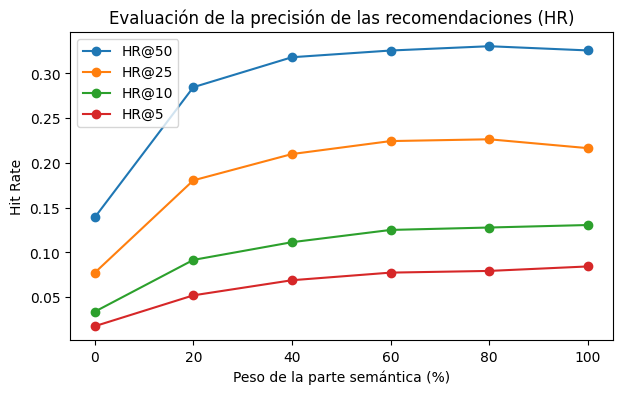

In [6]:
# Gráfica de HR para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["HR"], "o-", label="HR@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Hit Rate")
ax.set_title("Evaluación de la precisión de las recomendaciones (HR)")
ax.legend()
plt.show()

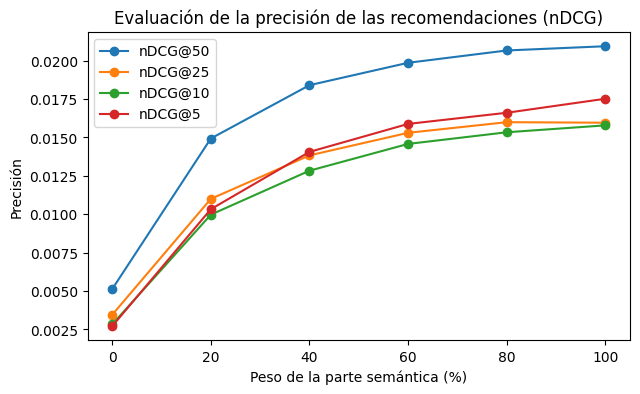

In [7]:
# Gráfica de nDCG para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["nDCG"], "o-", label="nDCG@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (nDCG)")
ax.legend()
plt.show()

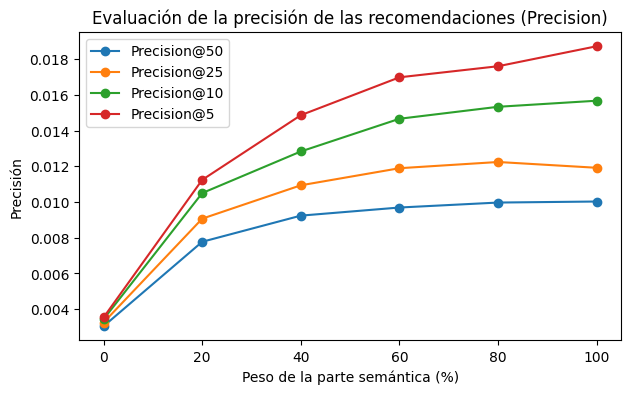

In [8]:
# Gráfica de Precision para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["Precision"], "o-", label="Precision@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (Precision)")
ax.legend()
plt.show()

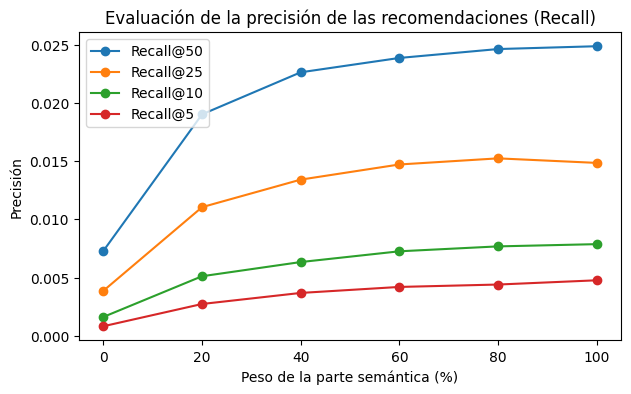

In [9]:
# Gráfica de Recall para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["Recall"], "o-", label="Recall@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (Recall)")
ax.legend()
plt.show()

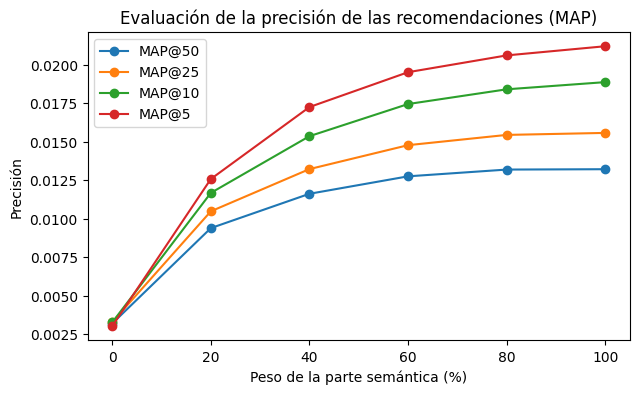

In [10]:
# Gráfica de MAP para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["MAP"], "o-", label="MAP@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (MAP)")
ax.legend()
plt.show()

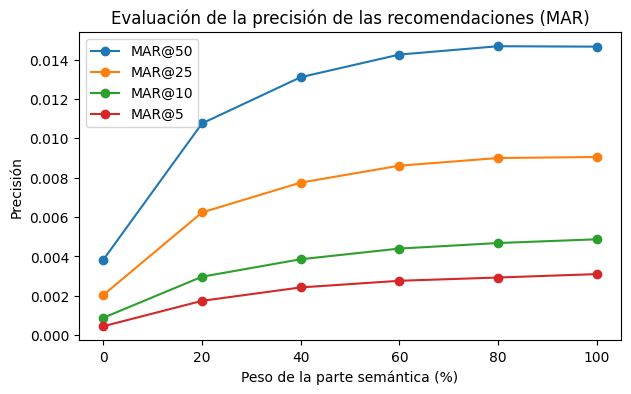

In [11]:
# Gráfica de MAR para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["MAR"], "o-", label="MAR@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (MAR)")
ax.legend()
plt.show()

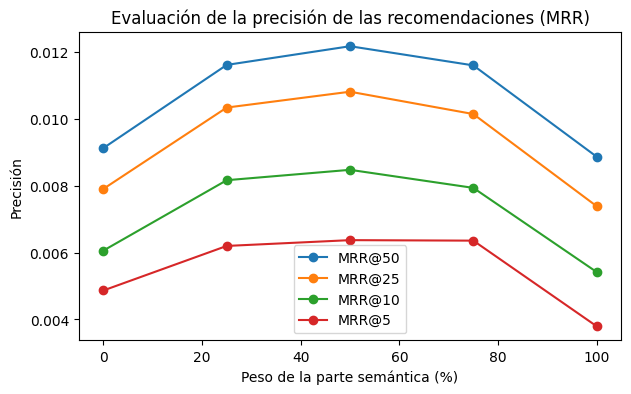

In [11]:
# Gráfica de MRR para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["MRR"], "o-", label="MRR@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (MRR)")
ax.legend()
plt.show()

Parece que la versión del modelo en la que la ponderación de cada componente es la misma es la que mejores resultados da a la hora de evaluar la precisión. No obstante, son valores bastante pobres. Sólo cuando hablamos de *hit ratio* es cuando obtenemos un modesto, pero insuficiente, 12% de tasa de acierto a la hora de recomendar (esto teniendo en cuenta sólo el test). 

Estos valores puden explicarse, quizá, por la gran cantidad de libros y diversidad de usuarios, siendo bastante complicado dar con, exactamente, los mismos libros con los que han interactuado. Por ello, se hizo un análisis adicional sobre la predicción de notas que un usuario daría a los libros que valoró, obteniendo unos resultados bastante mejores.

#### Cobertura

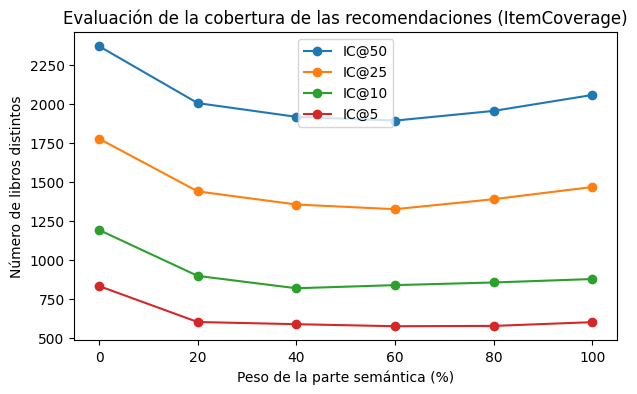

In [12]:
# Gráfica de ItemCoverage para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["ItemCoverage"], "o-", label="IC@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Número de libros distintos")
ax.set_title("Evaluación de la cobertura de las recomendaciones (ItemCoverage)")
ax.legend()
plt.show()

#### Novedad

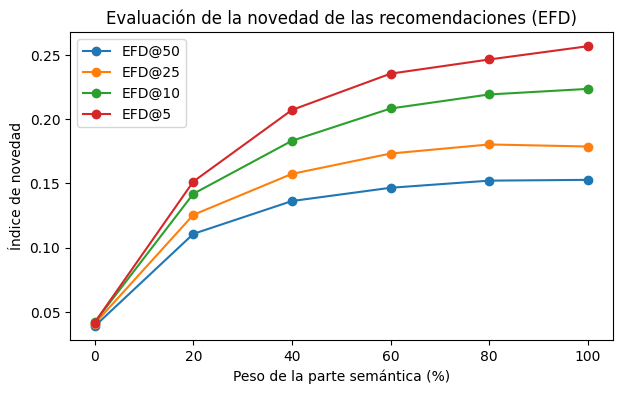

In [13]:
# Gráfica de EFD para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["EFD"], "o-", label="EFD@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Índice de novedad")
ax.set_title("Evaluación de la novedad de las recomendaciones (EFD)")
ax.legend()
plt.show()

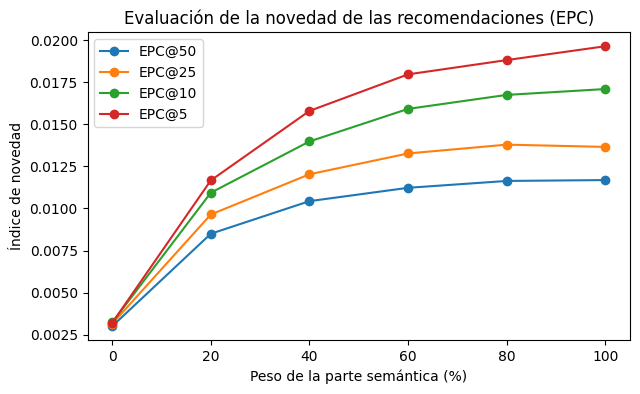

In [14]:
# Gráfica de EPC para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["EPC"], "o-", label="EPC@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Índice de novedad")
ax.set_title("Evaluación de la novedad de las recomendaciones (EPC)")
ax.legend()
plt.show()

#### Diversidad

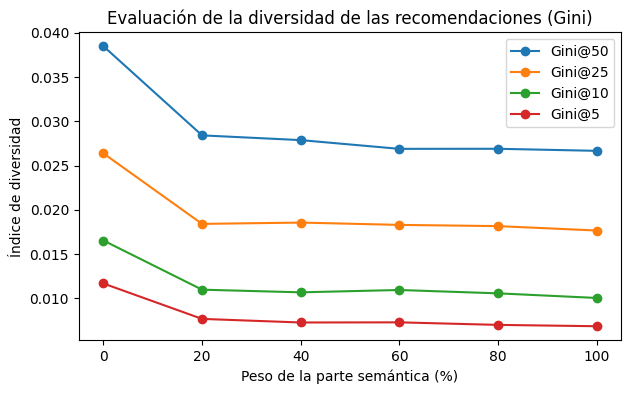

In [15]:
# Gráfica de Gini para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["Gini"], "o-", label="Gini@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Índice de diversidad")
ax.set_title("Evaluación de la diversidad de las recomendaciones (Gini)")
ax.legend()
plt.show()